In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
# 단순회귀분석
[Step 1] 데이터 준비 - read.csv() 함수로 자동차 연비 데이터셋 가져오기
'''

# csv 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
# 데이터 통계 요약정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
# 누락 데이터 확인
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [6]:
# 중복데이터 확인
df.duplicated().sum()

np.int64(0)

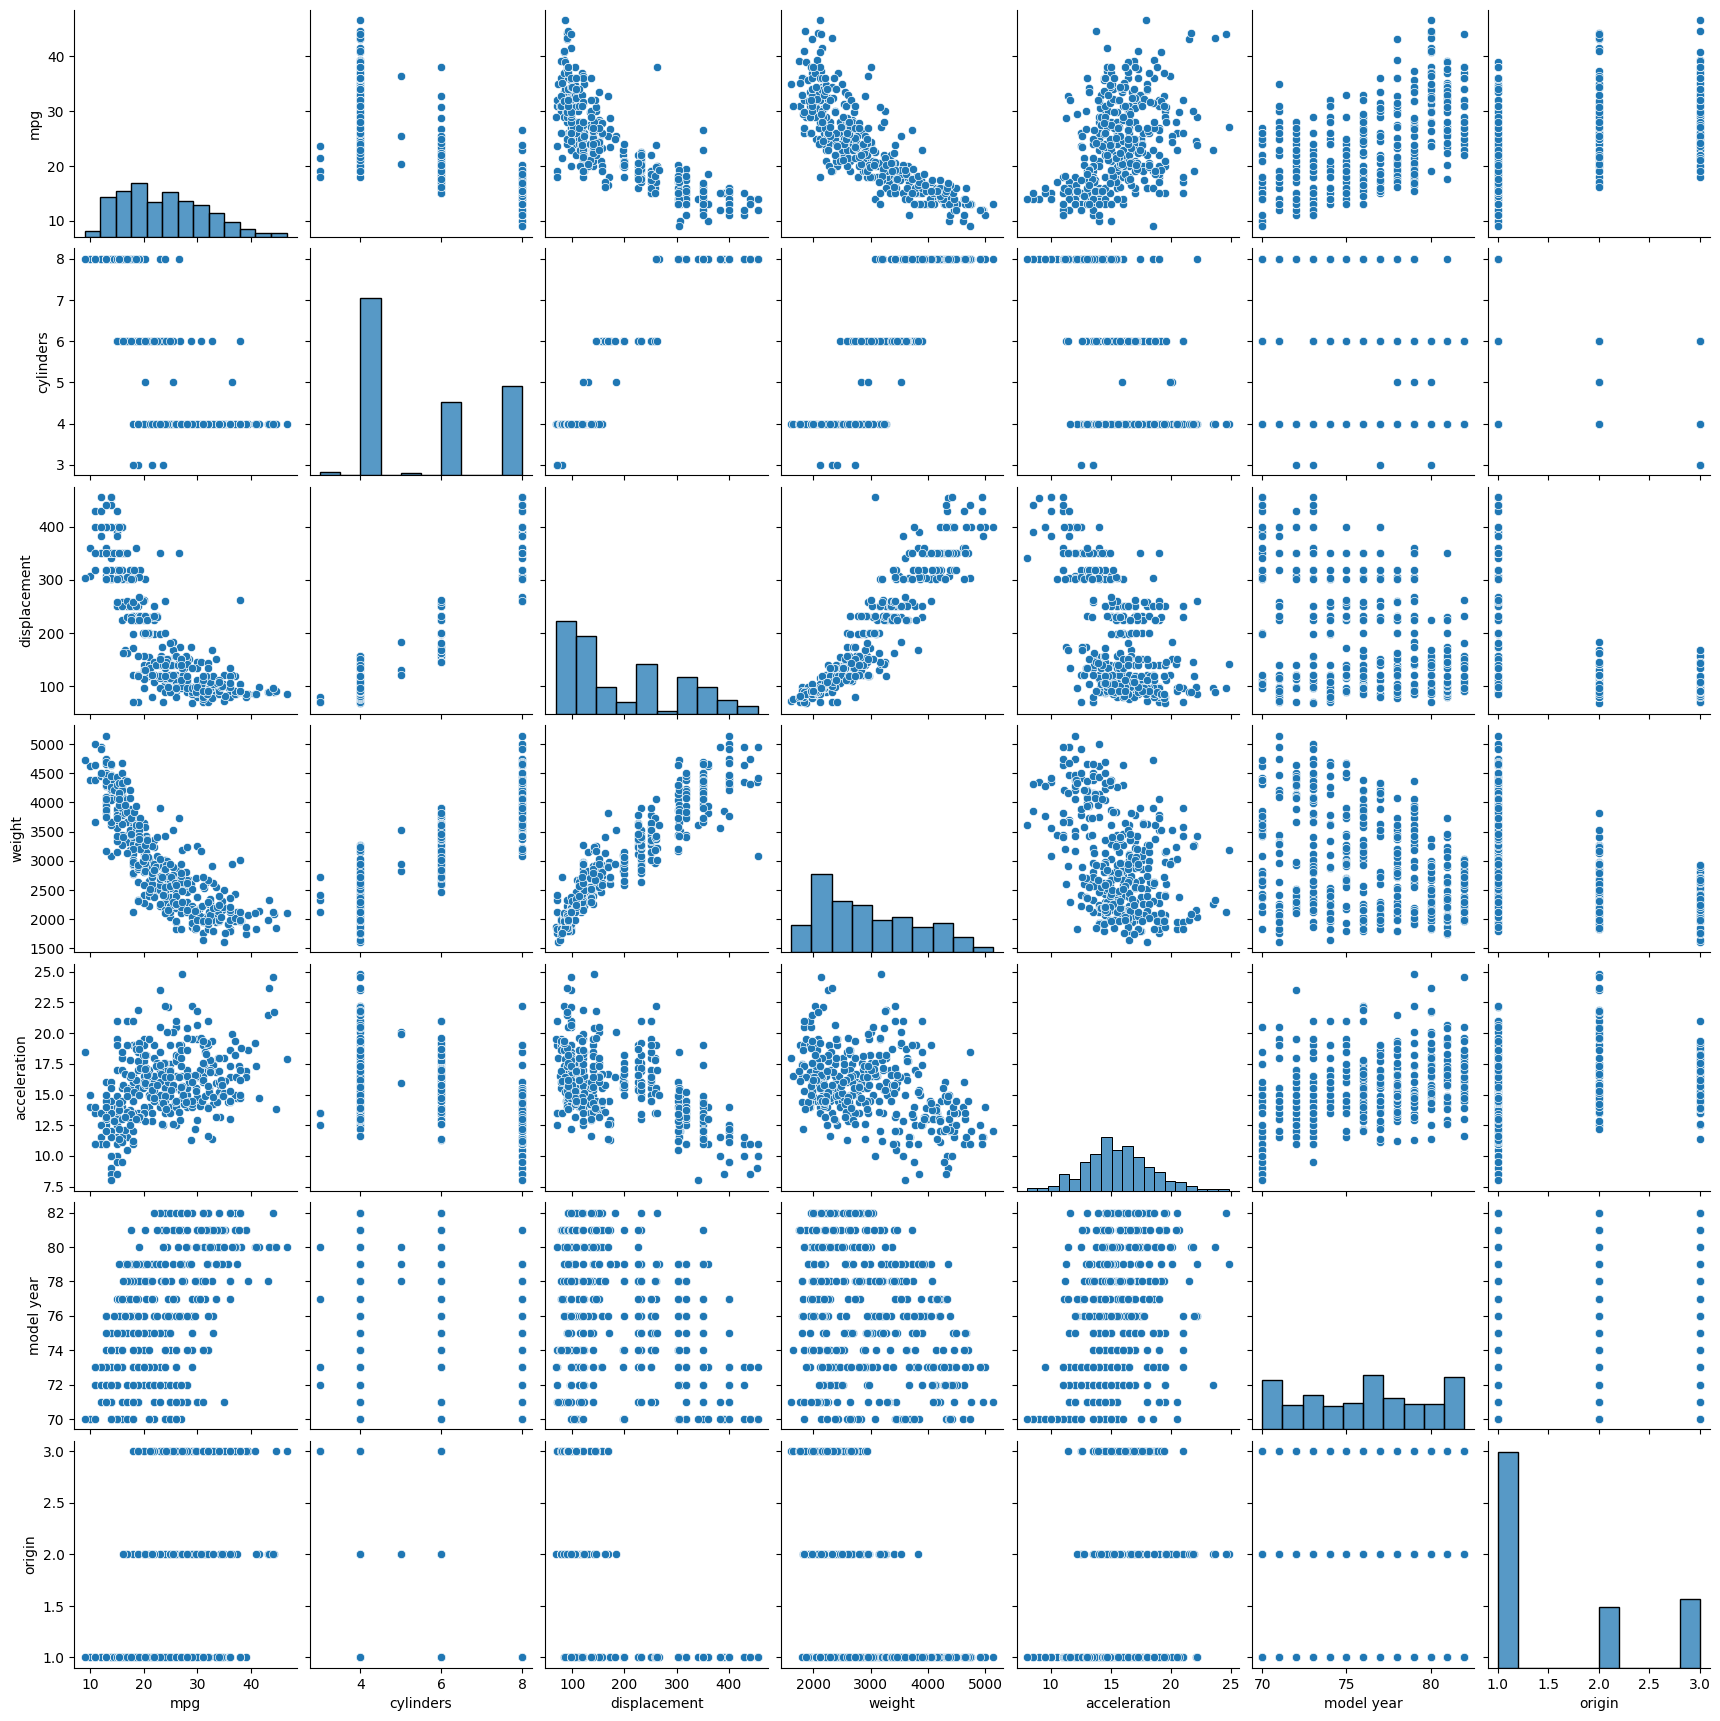

In [7]:
# seaborn pairplot
sns.pairplot(df)

In [8]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


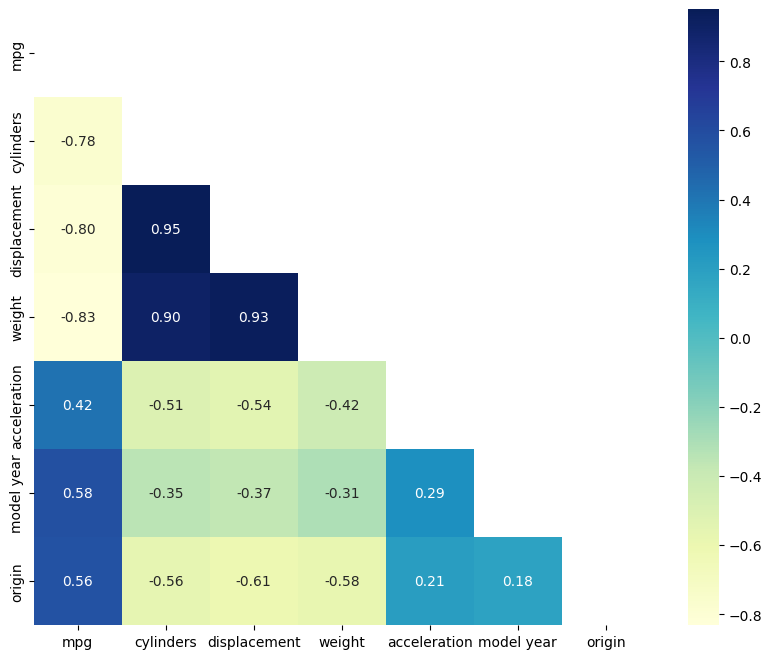

In [9]:
# 상관계수 분석 - 히트맵
mask = np.triu(np.ones_like(corr, dtype=bool)) # 마스크 생성(상단 트라이앵글을 숨김)

#히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='YlGnBu',
           annot=True, fmt='.2f', cbar=True, square=True)

plt.show()

In [10]:
'''
[Step 3] 데이터 전처리
'''

# horsepower 열의 고유값 확인
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [11]:
# horsepower 열의 자료형 변경(문자열 -> 숫자)

df['horsepower'] = df['horsepower'].replace('?', np.nan) # ? -> nan으로 변경
df['horsepower'] = df['horsepower'].astype('float')

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
# 결측치 제거
print(df['horsepower'].isnull().sum())
df_nan = df.dropna(subset=['horsepower'], axis=0)
print(df_nan['horsepower'].isnull().sum())

6
0


In [14]:
# 결측치 대체
print(df['horsepower'].isnull().sum())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
print(df_nan['horsepower'].isnull().sum())

6
0


In [15]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [16]:
'''
[Step 4] 변수(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf=df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


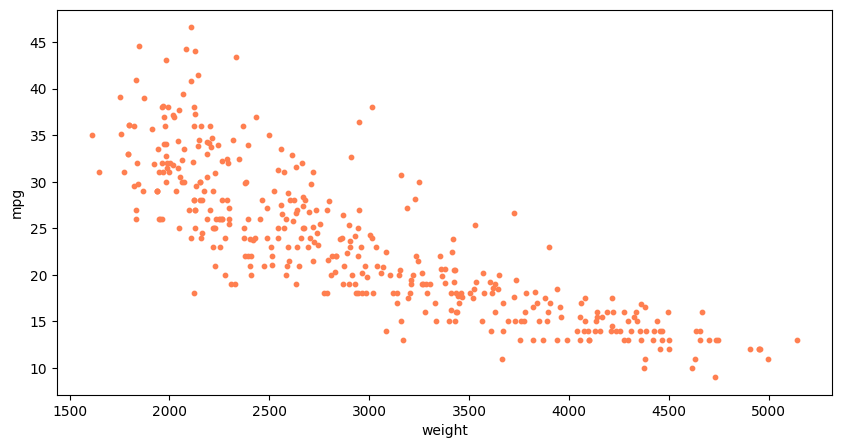

In [17]:
### 종속변수 Y인 연비(mpg)와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# pandas 함수로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()

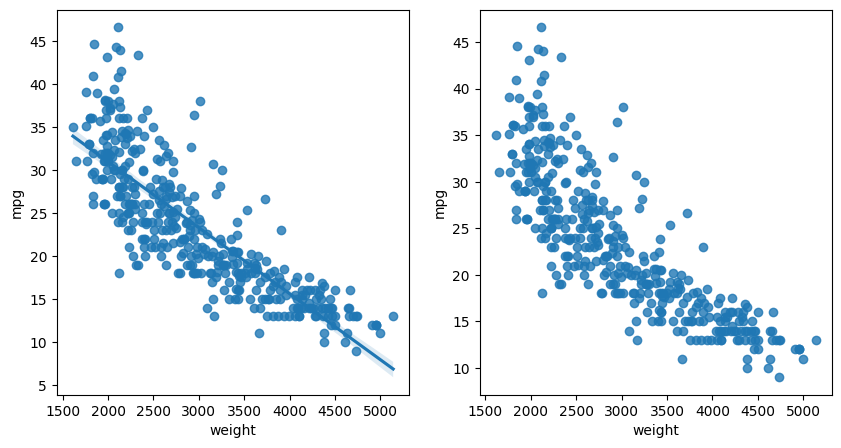

In [18]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1) # 1행 2열 중 1번째 서브플롯
ax2 = fig.add_subplot(1,2,2) # 1행 2열 중 2번째 서브플롯 -> 즉, 가로로 나란히 2개의 그래프를 만들겠다는 뜻
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1) # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False) # 회귀선 미표시
plt.show()

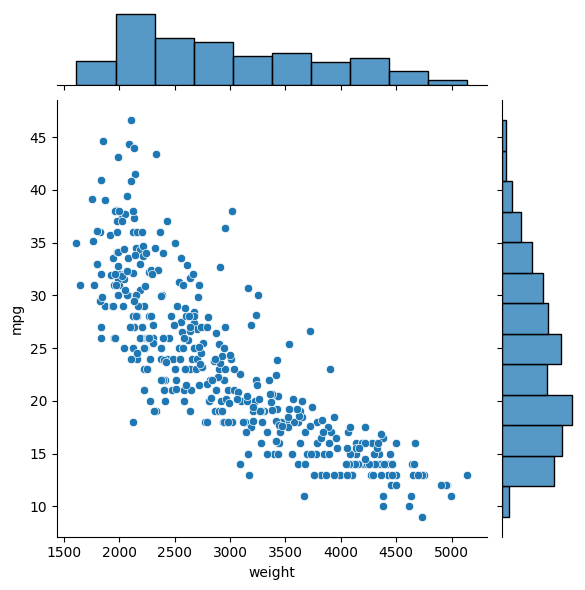

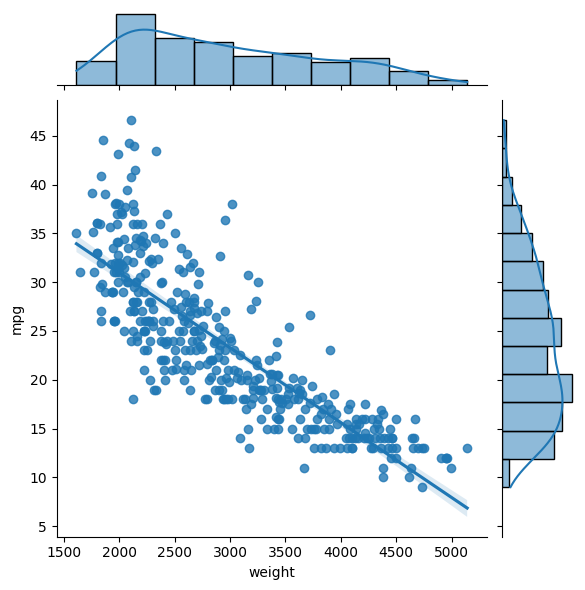

In [19]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf) # 회귀선 미표시
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf) # 회귀선 표시

In [21]:
'''
[Step 5] 데이터셋 구분 - 훈련용(train data)/검증용(test_data)
'''

# 속성(변수) 선택
x=ndf[['weight']] # 독립변수 x
y=ndf['mpg'] # 종속변수 y

# train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, # 독립 변수
                                                   y, # 종속 변수
                                                   test_size=0.3, # 검증 30%
                                                   random_state=10) # 랜덤 추출 값

print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  278
test data 개수:  120


In [22]:
'''
[Step 6] 단순회귀분석 모델 - sklearn 사용
'''

# skearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()

# train data를 가지고 모델 학습
lr.fit(x_train, y_train)

# 학습을 마친 모델에 test_data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(x_test, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.689363809315209


In [26]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

# 회귀식의 y절편
print('y절편 b: ', lr.intercept_)

기울기 a:  [-0.0076554]
y절편 b:  46.60365052224634


In [27]:
# 모델에 test_data 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat=lr.predict(x_test)

# 오차 계산
test_preds= pd.DataFrame(y_test)
test_preds.columns=['y_test']
test_preds['y_hat']=y_hat
test_preds['squared_error']=(test_preds['y_hat']-test_preds['y_test'])**2
test_preds

,y_test,y_hat,squared_error
331,33.8,30.182824,13.083965
111,18.0,30.343587,152.364137
350,34.7,29.646946,25.533357
205,28.0,30.106270,4.436372
56,26.0,31.637349,31.779704
...,...,...,...
17,21.0,26.799138,33.630001
225,17.5,19.656652,4.651150
223,15.5,14.910306,0.347739
59,23.0,29.348385,40.301995


In [28]:
# 평균제곱 오차
mse = test_preds['squared_error'].mean()
print('mse : ', mse)

mse :  17.898336128759958


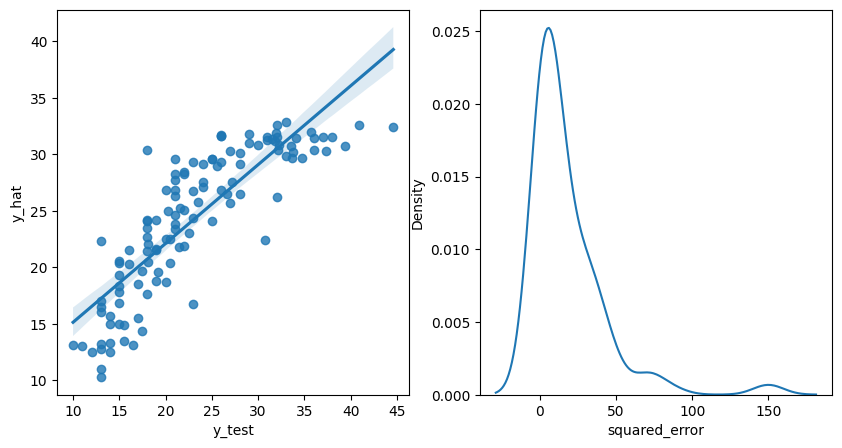

In [29]:
# 오차분석
fig, axes = plt.subplots(1,2,figsize=(10,5)) # 1행 2열 subplot 구조를 생성, # axes[0]과 axes[1]으로 각각의 subplot에 접근
sns.regplot(x='y_test', y='y_hat', data=test_preds, ax=axes[0]); # 예측값 vs 실제값 (회귀진단)
sns.kdeplot(x='squared_error', data=test_preds, ax=axes[1]); # 오차 분포 (밀도 그래프)